In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [2]:
mnist = fetch_mldata('MNIST original')

In [3]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [4]:
X, y = mnist["data"], mnist["target"]

In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y,
    shuffle = True,random_state=144)

In [8]:
X_train.shape

(52500, 784)

In [9]:
y_train.shape

(52500,)

In [10]:
X_test.shape

(17500, 784)

In [11]:
y_test.shape

(17500,)

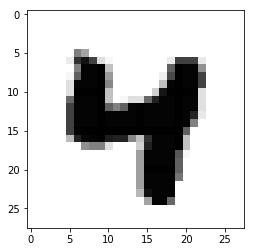

In [12]:
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[25001]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image,cmap = matplotlib.cm.binary)

In [13]:
rf = RandomForestClassifier(n_jobs=-1,n_estimators=100)

In [14]:
rf = rf.fit(X_train,y_train)

In [15]:
rf.score(X_test, y_test)

0.9664571428571429

In [16]:
pred_rf = rf.predict(X_test)

In [17]:
confusion = confusion_matrix(y_test, pred_rf)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[1707    1    3    1    0    4    2    0    7    1]
 [   0 1941    7    5    2    2    3    2    3    4]
 [   7    2 1698    5   10    0    3   10   11    2]
 [   4    2   22 1687    2   18    4   16   20   10]
 [   1    2    4    0 1664    0    8    4    3   20]
 [   4    2    2   17    2 1519   11    3   11    7]
 [   9    4    3    0    1   13 1685    0    4    0]
 [   2   10   16    3   14    0    0 1754    1   23]
 [   1    9   13   12    9   17    6    2 1621   16]
 [   5    5    3   19   22    7    1   25   16 1637]]


In [18]:
svm_model = svm.LinearSVC(C=1.0)
svm_model.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [20]:
print("Training set score: {:.3f}".format(svm_model.score(X_train, y_train)))
print("Test set score: {:.3f}".format(svm_model.score(X_test, y_test)))

Training set score: 0.839
Test set score: 0.821


In [21]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\MASTER\Anaconda3\envs\fastai\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [22]:
svm_model = svm.LinearSVC(C=1.0)
svm_model.fit(X_train_scaled, y_train)
print("Train set accuracy: {:.2f}".format(svm_model.score(X_train_scaled, y_train)))
print("Test set accuracy: {:.2f}".format(svm_model.score(X_test_scaled, y_test)))

Train set accuracy: 0.92
Test set accuracy: 0.90


In [23]:
pred_svm = svm_model.predict(X_test_scaled)

In [24]:
f1_score(y_test, pred_svm,average='macro')

0.9023655964172359

In [25]:
confusion = confusion_matrix(y_test, pred_svm)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[1686    0    4    8    3    6    7    0   11    1]
 [   1 1913   11    7    2   10    0    4   19    2]
 [  10   18 1529   43   21   16   18   25   58   10]
 [   9    8   40 1584    5   51    7   16   40   25]
 [   4    5   18   11 1575    9   15    5   17   47]
 [  20    5   18   83   16 1338   28   11   37   22]
 [  13    8   29    3   13   36 1606    2    8    1]
 [   9   16   22   10   22    8    1 1672    9   54]
 [  15   39   28   73   17   67   17    5 1408   37]
 [   7   13   10   35   67   14    0   66   22 1506]]
